<font size = "5"> Importing Libraries </font> 

In [1]:
%%capture
cd ..

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from utils.unicode_utils import create_df_unicode, code_type, get_language, make_picture
from utils.complexity_metrics import pixel_count_complexity
import pandas as pd   #not necessary -- was just testing things out and might as well have it

<font size = "5">   </font>

<font size = "5"> Creating the DataFrames </font>

In [3]:
df_unicode = create_df_unicode()
df_unicode

,code,note,rep
0,0020,SPACE,
1,0021,EXCLAMATION MARK,!
2,0022,QUOTATION MARK,""""
3,0023,NUMBER SIGN,#
4,0024,DOLLAR SIGN,$
...,...,...,...
34818,E01EB,VARIATION SELECTOR-252,󠇫
34819,E01EC,VARIATION SELECTOR-253,󠇬
34820,E01ED,VARIATION SELECTOR-254,󠇭
34821,E01EE,VARIATION SELECTOR-255,󠇮


In [4]:
print(df_unicode['rep'][1000])     #so this will give you any of the characters and their representation, along with their code
print(df_unicode['note'][1000])    #gives the name of the character
print(df_unicode['code'][1000])     #gives the coded number universal for this character

в
CYRILLIC SMALL LETTER VE
0432


<font size = "5">   </font>

<font size = "5"> Cutting DataFrame and Adding Language Column </font>

dataframe.apply = dataframe method that applies a function to a specific column in a dataframe, in this case, df_unicode.code is specifying the column to be used ("code")  ---> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

code_type function can be found in unicode_utils.py and determines the code type of the unicode code -- so we only want "Writing Symbol"'s because that's what we are working with. So the portion that says df_unicode[....].reset_index(drop=True) is first masking the dataframe by having a "true/false" statement in the brackets to determine which rows follow the requirement of the character being a writing symbol and eliminates the rows that do not follow this requirement. The reset index is just resetting the counting of all the rows to ignore the lost rows. 

In [5]:
dfu = df_unicode[df_unicode.code.apply(code_type)=='Writing Symbol'].reset_index(drop=True)  #isolating writing symbols

dfu['language'] = dfu.note.apply(get_language)   #this then applies the get_lanugage function to the dataframe column "note"
                                 #this also assumes the first word of "note" is always the langauge -- double check
    
dfu.language.value_counts()        #returns the counts for each unique value in the new "language" column,
                                    #essentially, all the languages and their counts

ARABIC         1330
CUNEIFORM      1234
YI             1220
LATIN          1213
CJK            1165
               ... 
GROUP             1
UNCERTAINTY       1
NEPTUNE           1
BALLOT            1
SPACE             1
Name: language, Length: 819, dtype: int64

In [6]:
# for i in dfu.language.value_counts().index:
#     print(i)
#     print(' '.join([u(k) for k in dfu[dfu.language==i].code]))

<font size = "5">  </font>

<font size = "5"> Printing Myanmar Representations </font>

' '.join() just joins a bunch of objects in a list separated by whatever is in the apostrophes. In this case, a space is in the apostrophes. This is once again masking the dfu dataframe using the true/false statement of whether the language = Myanmar. Reminder: dfu.rep is just the column "rep" so we're printing all the representations.

In [7]:
' '.join(dfu[dfu.language=='MYANMAR'].rep)

'က ခ ဂ ဃ င စ ဆ ဇ ဈ ဉ ည ဋ ဌ ဍ ဎ ဏ တ ထ ဒ ဓ န ပ ဖ ဗ ဘ မ ယ ရ လ ဝ သ ဟ ဠ အ ဢ ဣ ဤ ဥ ဦ ဧ ဨ ဩ ဪ ါ ာ ိ ီ ု ူ ေ ဲ ဳ ဴ ဵ ံ ့ း ္ ် ျ ြ ွ ှ ဿ ၀ ၁ ၂ ၃ ၄ ၅ ၆ ၇ ၈ ၉ ၊ ။ ၌ ၍ ၎ ၏ ၐ ၑ ၒ ၓ ၔ ၕ ၖ ၗ ၘ ၙ ၚ ၛ ၜ ၝ ၞ ၟ ၠ ၡ ၢ ၣ ၤ ၥ ၦ ၧ ၨ ၩ ၪ ၫ ၬ ၭ ၮ ၯ ၰ ၱ ၲ ၳ ၴ ၵ ၶ ၷ ၸ ၹ ၺ ၻ ၼ ၽ ၾ ၿ ႀ ႁ ႂ ႃ ႄ ႅ ႆ ႇ ႈ ႉ ႊ ႋ ႌ ႍ ႎ ႏ ႐ ႑ ႒ ႓ ႔ ႕ ႖ ႗ ႘ ႙ ႚ ႛ ႜ ႝ ႞ ႟ ꧠ ꧡ ꧢ ꧣ ꧤ ꧥ ꧦ ꧧ ꧨ ꧩ ꧪ ꧫ ꧬ ꧭ ꧮ ꧯ ꧰ ꧱ ꧲ ꧳ ꧴ ꧵ ꧶ ꧷ ꧸ ꧹ ꧺ ꧻ ꧼ ꧽ ꧾ ꩠ ꩡ ꩢ ꩣ ꩤ ꩥ ꩦ ꩧ ꩨ ꩩ ꩪ ꩫ ꩬ ꩭ ꩮ ꩯ ꩰ ꩱ ꩲ ꩳ ꩴ ꩵ ꩶ ꩷ ꩸ ꩹ ꩺ ꩻ ꩼ ꩽ ꩾ ꩿ'

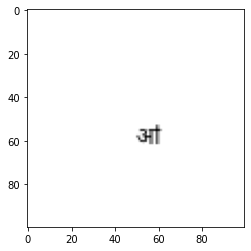

CPU times: total: 19 s
Wall time: 21.6 s


In [9]:
%%time
#prints wall time for the whole cell
dfu['picture'] = dfu.code.apply(lambda x: make_picture(x,'data/ttfs/NotoSans-Regular.ttf')) #again, applying function to column
plt.imshow(dfu.iloc[2280].picture,cmap='gray')
plt.show()

<font size = "5"> Sorting in Order of Complexity </font>

This complexity metric only computes fraction of black pixels in image to determine a "complexity"

In [10]:
dfu['pixel_count_complexity'] = dfu.picture.apply(pixel_count_complexity)

'   '.join(dfu.sort_values('pixel_count_complexity',ascending=True).rep.iloc[:100].values)

'Ԫ   ℻   Ꙭ   �   ‱   Ǆ   Ꚙ   Ꝏ   Ꚗ   Ǳ   Ѭ   Ꚅ   ǅ   Ѹ   Ꟃ   Ꜵ   ॵ   Ꜳ   ʥ   औ   ꟿ   ԫ   ʤ   Ǌ   ऑ   ǋ   ऒ   Ԭ   ǲ   ǆ   ᵺ   Щ   Ѽ   ओ   ꭦ   Ŵ   ‰   Ӎ   Ꝡ   Ꙝ   Ꙧ   Ԣ   Ѿ   Ɱ   Ѩ   Ƣ   Ҧ   ﬄ   Ю   ꚗ   Ẃ   Ẁ   Ḿ   Ẅ   Ꙕ   ॠ   ॴ   Ꚛ   ₯   Ẇ   Ẉ   ꭁ   Ш   Ṁ   Ṃ   Ǿ   Ꜽ   ￼   Ԡ   Ǣ   ⁂   ʣ   ℔   ख़   Ꙣ   ǳ   №   ﬃ   Ꝙ   Ԙ   ѹ   ᾯ   ᾮ   Ꜩ   Ҋ   Œ   Ӂ   Ɯ   Ԝ   W   Ǽ   Μ   М   M   ꟽ   ₪   Ⱳ   Ꚉ   Ꚁ   आ'

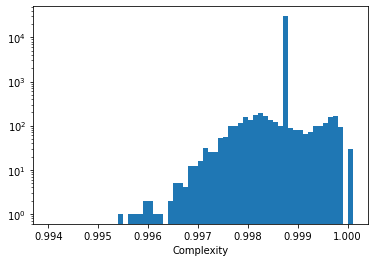

In [13]:
plt.hist(dfu.pixel_count_complexity, bins=np.arange(.994,1.0002,.0001)); plt.xlabel('Complexity')
plt.yscale('log')
plt.show()